<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:  Ali Ekhterachian

**Student ID**: 400100576



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [173]:
## Import necessary libraries here ##
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [174]:
## Write your code here ##
df = pd.read_csv('Boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


CRIM - per capita crime rate by town \
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. \
INDUS - proportion of non-retail business acres per town. \
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) \
NOX - nitric oxides concentration (parts per 10 million) \
RM - average number of rooms per dwelling \
AGE - proportion of owner-occupied units built prior to 1940 \
DIS - weighted distances to five Boston employment centres \
RAD - index of accessibility to radial highways \
TAX - full-value property-tax rate per $10,000 \
PTRATIO - pupil-teacher ratio by town \
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town \
LSTAT - % lower status of the population \
MEDV - Median value of owner-occupied homes in $1000's 

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [175]:
## train test split ##
traindf, testdf = train_test_split(df, test_size=0.2)
x_train, y_train = traindf.iloc[:,:-1], traindf.iloc[:,-1]
x_test, y_test = testdf.iloc[:,:-1], testdf.iloc[:,-1]

# standardization...
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

# to numpy array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()


print('X Train: ', x_train.shape)
print('Y Train: ', y_train.shape)
print('X Test : ', x_test.shape)
print('Y Test : ', y_test.shape)


X Train:  (404, 13)
Y Train:  (404,)
X Test :  (102, 13)
Y Test :  (102,)


In [176]:
## Train linear regression model ##
x_train_bias_added = np.append(np.ones([len(y_train), 1]), x_train, 1)
psinv_x_bias = np.linalg.pinv(x_train_bias_added)
w_linear_reg_bias = psinv_x_bias @ y_train
w_linear_reg_bias 

array([22.76410891, -0.70594989,  1.40616707, -0.1389265 ,  0.79940455,
       -2.17937141,  2.50675954,  0.64283993, -3.31567181,  3.07289754,
       -2.24634324, -2.06100408,  0.84909522, -4.36165309])

In [177]:
def mse(y1, y2):
    d = y1 - y2
    result = np.mean(d*d)
    return result

def rmse(y1, y2):
    return mse(y1,y2)**0.5

def r2_metric(y_test, y_pred):
    d = y_test - y_pred
    t = y_test - np.mean(y_test)
    t = np.sum(t*t)
    r = np.sum(d*d)
    return 1 - (r/t)

def predict(x, w):
    return w[0]+ (x @ w[1:]) 

train_predict = predict(x_train, w_linear_reg_bias)
test_predict = predict(x_test, w_linear_reg_bias)


print('Linear Regression Train R^2 : ', r2_metric(y_train, train_predict) )
print('Linear Regression Train RMSE: ', rmse(y_train, train_predict))
print()
print('Linear Regression Test R^2  : ', r2_metric(y_test, test_predict))
print('Linear Regression Test RMSE : ', rmse(y_test, test_predict))


Linear Regression Train R^2 :  0.7479342754683869
Linear Regression Train RMSE:  4.816224388169304

Linear Regression Test R^2  :  0.6031181392681024
Linear Regression Test RMSE :  4.597169299576781


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [178]:
## Write your code here ##
def ridge_reg(x, y, alpha):
    invm = np.linalg.inv((x.T @ x) + alpha*np.identity(x.shape[1]))
    invm = invm @ x.T
    return invm @ y


alphas = 10 ** np.linspace(3, -3, 100)*0.5

ws_ridge_reg = []
ridge_test_mse = []
ridge_train_mse = []
for a in alphas:
    w = ridge_reg(x_train_bias_added, y_train, a)
    ws_ridge_reg.append(w)
    yte = predict(x_test, w)
    ytr = predict(x_train, w)
    ridge_test_mse.append(mse(y_test,yte))
    ridge_train_mse.append(mse(y_train,ytr))
    
    

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

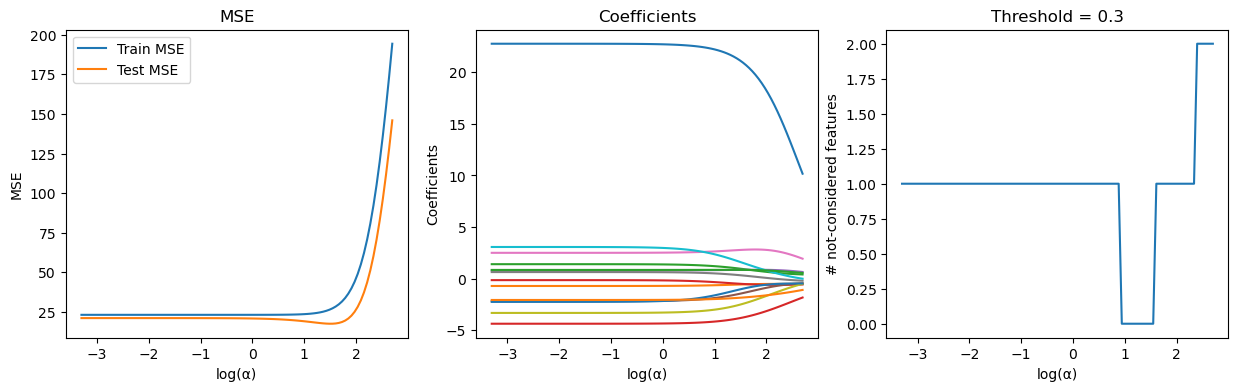

In [179]:
## Write your code here ##

### ################################# ###
### Not-Considered Features Threshold ###
threshold_not_considered_features = 0.3
### ################################# ###


plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('MSE')
plt.plot(np.log10(alphas), ridge_train_mse, label='Train MSE')
plt.plot(np.log10(alphas), ridge_test_mse,label='Test MSE')
plt.xlabel('log(α)')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1,3,2)
plt.title('Coefficients')
plt.plot(np.log10(alphas), ws_ridge_reg);
plt.xlabel('log(α)')
plt.ylabel('Coefficients')

not_cons_w = np.sum(np.heaviside(threshold_not_considered_features- np.abs(np.array(ws_ridge_reg)),0), 1)

plt.subplot(1,3,3)
plt.title('Threshold = '+ str(threshold_not_considered_features))
plt.plot(np.log10(alphas),not_cons_w );
plt.xlabel('log(α)')
plt.ylabel('# not-considered features');


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

In [180]:
## Write your code here ##
def train_lasso_reg(x_tr, y_tr, reg_cons_arr, max_iter = 50000 , lr = 0.00001):
    a = 2*(x_tr.T @ x_tr)
    b = -2*(x_tr.T @ y_tr)
    result = []
    for alpha in tqdm(reg_cons_arr):
        w = np.zeros(x_tr.shape[1])
        w_old = 0
        for _ in range(max_iter):
            grad = (a @ w) + b
            grad += alpha*np.sign(w)
            w_old = w
            w = w - lr*grad
            if np.linalg.norm(w_old - w) < 5e-4:
                break
            
        result.append(w)
    return result
        
lasso_train_param = train_lasso_reg(x_train_bias_added, y_train, alphas)



100%|██████████| 100/100 [00:06<00:00, 16.48it/s]


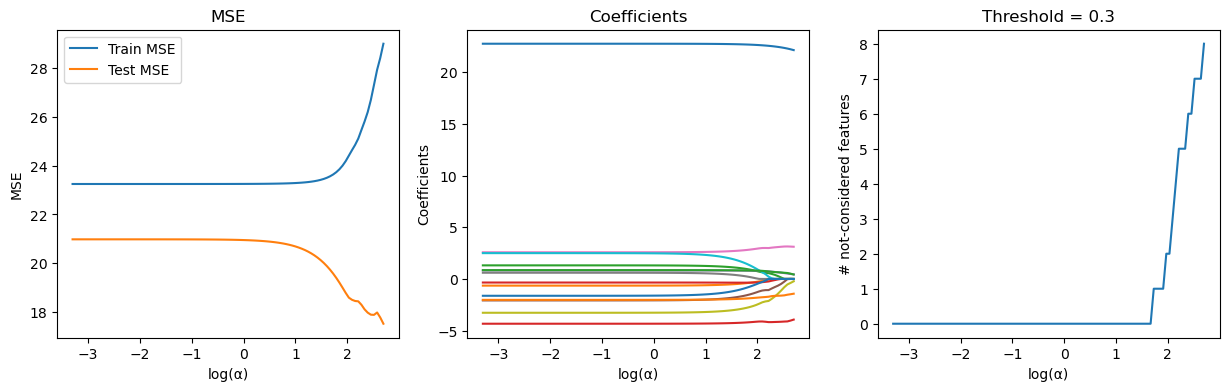

In [181]:
## Write your code here ##

### ################################# ###
### Not-Considered Features Threshold ###
threshold_not_considered_features = 0.3
### ################################# ###

lasso_test_mse = []
lasso_train_mse = []
for w in lasso_train_param:
    yte = predict(x_test, w)
    ytr = predict(x_train, w)
    lasso_test_mse.append(mse(y_test,yte))
    lasso_train_mse.append(mse(y_train,ytr))
    
    

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('MSE')
plt.plot(np.log10(alphas), lasso_train_mse, label='Train MSE')
plt.plot(np.log10(alphas), lasso_test_mse,label='Test MSE')
plt.xlabel('log(α)')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1,3,2)
plt.title('Coefficients')
plt.plot(np.log10(alphas), lasso_train_param);
plt.xlabel('log(α)')
plt.ylabel('Coefficients')

not_cons_w = np.sum(np.heaviside(threshold_not_considered_features- np.abs(np.array(lasso_train_param)),0), 1)

plt.subplot(1,3,3)
plt.title('Threshold = '+ str(threshold_not_considered_features))
plt.plot(np.log10(alphas),not_cons_w );
plt.xlabel('log(α)')
plt.ylabel('# not-considered features');


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

In [182]:
## Write you code here ##
def train_test_spl(df, train_size):
    traindf, testdf = train_test_split(df, test_size=(1-train_size))
    x_train, y_train = traindf.iloc[:,:-1], traindf.iloc[:,-1]
    x_test, y_test = testdf.iloc[:,:-1], testdf.iloc[:,-1]

    # standardization...
    x_train = (x_train - x_train.mean())/x_train.std()
    x_test = (x_test - x_test.mean())/x_test.std()

    # to numpy array
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    
    x_train_bias_added = np.append(np.ones([len(y_train), 1]), x_train, 1)
    x_test_bias_added = np.append(np.ones([len(y_test), 1]), x_test, 1)
    
    return x_train_bias_added, y_train, x_test_bias_added, y_test


def r2_mettric_array(y_result, y_test, alphas):
    rss = y_result - np.array([y_test]).T
    rss = rss*rss
    rss = np.sum(rss,0)
    best_index = np.argmin(rss)
    tot = (y_test-np.mean(y_test))
    tot = np.sum(tot*tot)
    best_r2 = 1- (rss[best_index]/tot)
    best_a = alphas[best_index]
    return best_r2, best_a
        
        
train_size_vals = [0.1, 0.15, 0.2,0.3,0.4,0.6,0.8]
ridge_alpha = []
lasso_alpha = []
ridge_r2 = []
lasso_r2 = []
reg_r2 = []

for tr_size in tqdm(train_size_vals):
    x_train_bias_added, y_train, x_test_bias_added, y_test = train_test_spl(df, tr_size)
    w_lasso = np.array(train_lasso_reg(x_train_bias_added, y_train, alphas)).T 
    y_lasso = x_test_bias_added @ w_lasso
    temp_lasso_result = r2_mettric_array(y_lasso, y_test, alphas)
    lasso_alpha.append(temp_lasso_result[1])
    lasso_r2.append(temp_lasso_result[0])
    
    tempr = []
    for a in alphas:
        tempr.append(ridge_reg(x_train_bias_added, y_train, a))
 
    w_ridge = np.array(tempr).T 
    temp_ridge_result = r2_mettric_array(x_test_bias_added @ w_ridge, y_test, alphas)
    ridge_alpha.append(temp_ridge_result[1])
    ridge_r2.append(temp_ridge_result[0])
    
    
    psinv_x_bias = np.linalg.pinv(x_train_bias_added)
    w_reg = psinv_x_bias @ y_train
    reg_r2.append(r2_metric(y_test, x_test_bias_added @ w_reg))
  



100%|██████████| 7/7 [02:09<00:00, 18.54s/it]


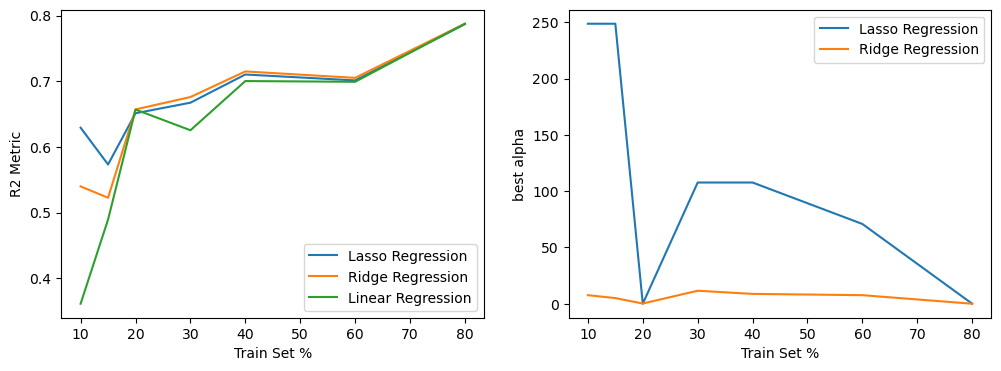

In [183]:
plt.figure(figsize=(12, 4))
t = np.array(train_size_vals)*100

plt.subplot(1,2,1)
plt.plot(t, lasso_r2 , label = 'Lasso Regression')
plt.plot(t, ridge_r2, label = 'Ridge Regression')
plt.plot(t, reg_r2, label = 'Linear Regression')
plt.legend()
plt.xlabel('Train Set %')
plt.ylabel('R2 Metric')

plt.subplot(1,2,2)
plt.plot(t, lasso_alpha , label = 'Lasso Regression')
plt.plot(t, ridge_alpha, label = 'Ridge Regression')
plt.legend()
plt.xlabel('Train Set %')
plt.ylabel('best alpha');


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    .container {
      display: flex;
      flex-direction: row-reverse;
    }
    .text {
      flex: 1;
      text-align: justify;
    }
    .title {
      flex: 0;
      text-align: right;
      margin-left: 20px;
    }
  </style>
</head>
<body>
  <div class="container">
    <div class="text">
      <p dir="rtl">
هرچه داده‌های train
 کمتر می‌شوند احتمال اورفیت شدن بیشتر می‌شود و عملکرد رگرسیون خطی از دو رگرسیون دیگر بدتر است هرچه داده ها بیشتر می‌شود این اختلاف کمتر مشاهده می‌شود.
<br>
بین دو نوع رگرسیون  نیز  عملکرد تقریبا مشابه است و در بعضی مقادیر lasso
 و در بعضی مقادیر ridge
  بهتر عمل می‌کند.
<br>
نکته دیگر قابل اشاره تغییر رفتار با اجراهای متعدد است  و با هر بار اجرای کد نمودار های به خصوص در ناحیه با تعداد داده تمرین کمتر تغییر زیادی می‌کند.
<br>
در مورد مقایسه آلفا ها چون مقدار norm
ها متفاوت است lasso
 از آلفا های بزرگتری نسبت به ridge
 استفاده می‌کند چرا که باید در عدد کوچکتری آن‌هارا ضرب کند.
 
<br>
نکته قابل توجه این است در هر مقداری که عملکرد رگرسیون خطی نسبت به دمورد دیگر بد می‌شود ضریب رگرسیون در آنجا مقدار بیشتری نسبت به سایر مقادیر دارد. (بدیهی اما جالب :) )
</br>
</p>
    </div>
  </div>
</body>
</html>
